### Notebook to visualize CUMULO dataset

Target file; `A2008.336.0000.nc`

In [4]:
import os
import gc
import glob
import numpy as np
from netCDF4 import Dataset

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

In [5]:
datadir = '/home/tkurihana/scratch-midway2/data/clouds/CUMULO'

In [6]:
filename = os.path.join(datadir, 'A2008.336.0000.nc')

In [9]:
f = Dataset(filename)

In [10]:
print(f.variables.keys()) # get all variable names

odict_keys(['time', 'longitude', 'latitude', 'ev_1km_emissive_29', 'ev_1km_emissive_33', 'ev_1km_emissive_34', 'ev_1km_emissive_35', 'ev_1km_emissive_36', 'ev_1km_emissive_27', 'ev_1km_emissive_20', 'ev_1km_emissive_21', 'ev_1km_emissive_22', 'ev_1km_emissive_23', 'ev_250_aggr1km_refsb_1', 'ev_250_aggr1km_refsb_2', 'ev_1km_refsb_26', 'cloud_water_path', 'cloud_optical_thickness', 'cloud_effective_radius', 'cloud_phase_optical_properties', 'cloud_top_pressure', 'cloud_top_height', 'cloud_top_temperature', 'cloud_emissivity', 'surface_temperature', 'cloud_mask', 'cloud_layer_type', 'cloud_layer_base', 'cloud_layer_top', 'cloud_type_quality', 'precipitation_flag'])


In [11]:
def importNetcdf(path=None, var_name=None):
    nc_fid=Dataset(path, 'r')
    field = nc_fid.variables[var_name][:]
    return field

In [12]:
cloud_types = importNetcdf(filename,  'cloud_layer_type')

In [13]:
cloud_types.shape

(1, 1354, 2030, 10)

(array([34.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

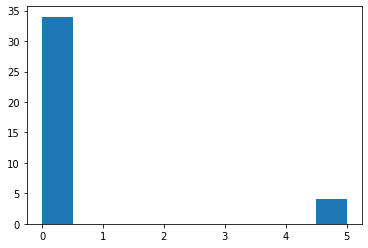

In [27]:
plt.hist(np.ravel(cloud_types))

In [16]:
np.max(cloud_types), np.min(cloud_types)

(5, 0)

In [34]:
cloud_array = -1*np.zeros(cloud_types.shape)
for i in range(8):
    idx = np.where(cloud_types == i)
    cloud_array[idx] = i
cloud_array = np.squeeze(cloud_array, axis=0)[:,:,0]

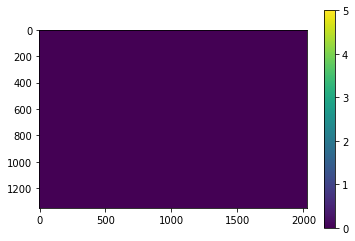

In [35]:
plt.figure()
plt.imshow(cloud_array)
plt.colorbar()
plt.show()